In [69]:
#pip install tensorflow


In [71]:
#!pip install keras


In [70]:
#!pip install opencv-python


In [33]:
import pandas as pd
import numpy as np
import keras
import cv2
from matplotlib import pyplot as plt
import os
import random
from PIL import Image

In [74]:
df=pd.read_csv("train.csv")
base_path="C:\train"

In [35]:
df.head()

,id,url,landmark_id
0,6e158a47eb2ca3f6,https://upload.wikimedia.org/wikipedia/commons...,142820
1,202cd79556f30760,http://upload.wikimedia.org/wikipedia/commons/...,104169
2,3ad87684c99c06e1,http://upload.wikimedia.org/wikipedia/commons/...,37914
3,e7f70e9c61e66af3,https://upload.wikimedia.org/wikipedia/commons...,102140
4,4072182eddd0100e,https://upload.wikimedia.org/wikipedia/commons...,2474


In [36]:
samples=20000
df=df.iloc[:samples, :]
num_classes=len(df["landmark_id"].unique())
num_data =len(df)

In [37]:
num_classes

16341

In [38]:
num_data

20000

In [39]:
data=pd.DataFrame(df["landmark_id"].value_counts())

data.reset_index(inplace=True)
data.head()

,index,landmark_id
0,138982,57
1,177870,22
2,62798,20
3,192931,16
4,171772,14


In [40]:
data.tail()

,index,landmark_id
16336,162189,1
16337,61959,1
16338,194142,1
16339,171822,1
16340,18915,1


In [51]:
data.columns=['landmark_id','count']
data['count'].describe()

count    16341.000000
mean         1.223915
std          0.825085
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         57.000000
Name: count, dtype: float64

(array([0.0000e+00, 1.3866e+04, 0.0000e+00, 1.8470e+03, 0.0000e+00,
        4.0500e+02, 1.2300e+02, 0.0000e+00, 3.9000e+01, 0.0000e+00,
        2.5000e+01, 0.0000e+00, 1.5000e+01, 6.0000e+00, 0.0000e+00,
        3.0000e+00, 0.0000e+00, 4.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

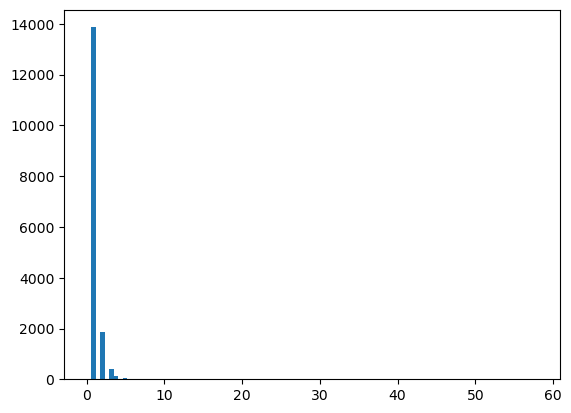

In [52]:
plt.hist(data['count'],100,range=(0,58),label='test')

In [53]:
data['count'].between(0,5).sum()

16280

In [56]:
data['count'].between(5,10).sum()

92

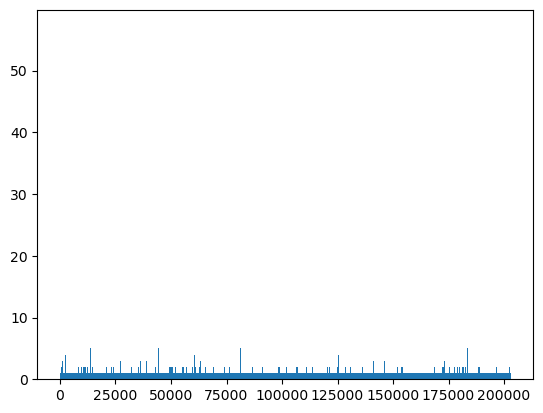

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Get unique landmark IDs
unique_landmark_ids = df["landmark_id"].unique()

# Sort the unique IDs in ascending order
unique_landmark_ids.sort()

# Plot the histogram
plt.hist(df["landmark_id"], bins=unique_landmark_ids)

# Display the plot
plt.show()


In [59]:
from sklearn.preprocessing import  LabelEncoder
lencoder =LabelEncoder()
lencoder.fit(df["landmark_id"])

LabelEncoder()

In [60]:
df.head()

,id,url,landmark_id
0,6e158a47eb2ca3f6,https://upload.wikimedia.org/wikipedia/commons...,142820
1,202cd79556f30760,http://upload.wikimedia.org/wikipedia/commons/...,104169
2,3ad87684c99c06e1,http://upload.wikimedia.org/wikipedia/commons/...,37914
3,e7f70e9c61e66af3,https://upload.wikimedia.org/wikipedia/commons...,102140
4,4072182eddd0100e,https://upload.wikimedia.org/wikipedia/commons...,2474


In [61]:
def encode_label(lbl):
    return lencoder.transform(lbl)

In [62]:
def decode_label(lbl):
    return lencoder.inverse_transform(lbl)

In [65]:
def get_image_from_number(num,df):
    fname,label=df.iloc[num,:]
    fname=fname+ '.jpg'
    f1=fname[0]
    f2=fname[1]
    f3=fname[2]
    path=os.path.join(f1,f2,f3,fname)
    im=cv2.imread(os.path.join(base_path,path))
    return im,label

In [80]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Specify the correct base path to the directory containing the images
base_path = "C:/train"

print("4 sample images from random classes")
fig = plt.figure(figsize=(16, 16))
for i in range(1, 5):
    try:
        # Randomly select directories
        ri = random.choices(os.listdir(base_path), k=3)
        folder = os.path.join(base_path, ri[1], ri[2])
        
        # Get a random image from the selected directory
        files = os.listdir(folder)
        if files:
            random_img = random.choice(files)
            img = np.array(Image.open(os.path.join(folder, random_img)))

            fig.add_subplot(1, 4, i)
            plt.imshow(img)
            plt.axis('off')
        else:
            raise ValueError("No files found in the selected directory.")
    except (OSError, IndexError, ValueError) as e:
        print(f"Error occurred while processing image {i}: {str(e)}")

plt.show()


4 sample images from random classes
Error occurred while processing image 1: [WinError 3] The system cannot find the path specified: 'C:/train\\005e1fcd4e484e75.jpg\\003a0cc8aa8d08fa.jpg'
Error occurred while processing image 2: [WinError 3] The system cannot find the path specified: 'C:/train\\003ddc95342a3018.jpg\\005aae6082cb7f67.jpg'
Error occurred while processing image 3: [WinError 3] The system cannot find the path specified: 'C:/train\\000dc501fcd33898.jpg\\005acc08c7dd1244.jpg'
Error occurred while processing image 4: [WinError 3] The system cannot find the path specified: 'C:/train\\003dbdb9a816756e.jpg\\002e3c27cc27cb68.jpg'


<Figure size 1600x1600 with 0 Axes>

In [86]:
import tensorflow as tf
from keras.applications.vgg19 import VGG19
from keras.layers import *
from keras import Sequential

tf.compat.v1.disable_eager_execution()


In [88]:
learning_rate =0.0001

decay_speed =1e-6
momemtum = 0.09
loss_function= "sparse_categorical_crossentropy" 
source_model=VGG19(weights=None)

drop_layer=Dropout (0.5) 
drop_layer2=Dropout (0.5)

In [95]:
model = Sequential()
input_shape = (224, 224, 3)  # Specify the correct input shape
model.add(InputLayer(input_shape=input_shape))

for layer in source_model.layers[:-1]:
    if layer == source_model.layers[-25]:
        model.add(BatchNormalization())
    model.add(layer)

model.add(Dense(num_classes, activation="softmax"))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        multiple                  0         
                                                                 
 batch_normalization_2 (Bat  (None, 224, 224, 3)       12        
 chNormalization)                                                
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                      

In [99]:
import tensorflow.keras as keras

optim1 = keras.optimizers.RMSprop(lr=learning_rate)
model.compile(optimizer=optim1,
              loss=loss_function, 
              metrics=["accuracy"])


In [100]:
def image_reshape(im,target_size):
    return cv2.resize(im,target_size)

In [117]:
def get_image_from_number(num, df):
    fname, label = df.iloc[num, :2]  # Adjust the indexing based on your dataframe structure
    fname = fname + '.jpg'
    f1 = fname[0]

    # Example implementation: Read image from file
    image = read_image_from_file(fname)

    # Example implementation: Return image and label
    return image, label

def get_batch(df, start, batch_size):
    image_array = []
    label_array = []
    end_img = start + batch_size
    if end_img > len(df):
        end_img = len(df)

    for idx in range(start, end_img):
        n = idx
        im, label = get_image_from_number(n, df)
        if im is not None:  # Check if image is valid
            im = image_reshape(im, (224, 224)) / 255.0
            image_array.append(im)
            label_array.append(label)

    label_array = encode_label(label_array)

    return np.array(image_array), np.array(label_array)


In [118]:
batch_size = 16
epoch_shuffle =True
weight_classes=True
epochs =1
train,val =np.split(df.sample(frac=1),[int(0.8*len(df))])
print(len(train))
print(len(val))

3306331
826583
